In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10,6.180)})
sns.set_style("whitegrid")

In [2]:
%matplotlib inline

In [64]:
def my_reorder(a, first):
    # move first to the top. and keep the rest
    new_order = first.copy()
    for col in a:
        if col not in first:
            new_order.append(col)
    return new_order

In [69]:
def read_pdb(name):
    all_data = []
    for i in range(20):
        for j in range(2):
            pre = "/Users/weilu/Research/server/nov_2018/iterative_optimization_3/all_simulations/"
            location = pre + f"{name}/simulation/{i}/{j}/"
            try:
                wham = pd.read_csv(location+"wham.dat")
            except:
                print(f"PDB: {name}, repeat: {i}, run: {j} not exist")
                continue
            wham.columns = wham.columns.str.strip()
            remove_columns = ['Tc', 'Energy']
            wham = wham.drop(remove_columns, axis=1)
            energy = pd.read_csv(location+"energy.dat")
            energy.columns = energy.columns.str.strip()
            remove_columns = ['Steps', 'Shake', 'Excluded', 'DSSP', 'Helix', 'AMH-Go', 'Vec_FM', 'Membrane', 'SSB']
            energy = energy.drop(remove_columns, axis=1)
            data = pd.concat([wham, energy], axis=1).assign(Repeat=i, Run=j)
            all_data.append(data)
    data = pd.concat(all_data).reset_index(drop=True)
    data = data.reindex(columns=my_reorder(data.columns, ["Steps", "Qw", "VTotal", "Run", "Repeat"]))
    print(name, len(data))
    return data

In [71]:
pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
all_data = []
for p in pdb_list:
    name = p.lower()[:4]
    tmp = read_pdb(name)
    all_data.append(tmp)
data = pd.concat(all_data)

1r69 40000
1utg 40000
3icb 40000
256b 40000
PDB: 4cpv, repeat: 0, run: 1 not exist
PDB: 4cpv, repeat: 4, run: 1 not exist
4cpv 36000
1ccr 40000
PDB: 2mhr, repeat: 0, run: 1 not exist
PDB: 2mhr, repeat: 1, run: 1 not exist
PDB: 2mhr, repeat: 2, run: 1 not exist
PDB: 2mhr, repeat: 3, run: 1 not exist
PDB: 2mhr, repeat: 4, run: 1 not exist
PDB: 2mhr, repeat: 5, run: 1 not exist
PDB: 2mhr, repeat: 6, run: 1 not exist
PDB: 2mhr, repeat: 7, run: 1 not exist
PDB: 2mhr, repeat: 8, run: 1 not exist
PDB: 2mhr, repeat: 9, run: 1 not exist
2mhr 28610
PDB: 1mba, repeat: 9, run: 1 not exist
PDB: 1mba, repeat: 15, run: 1 not exist
1mba 18000
PDB: 2fha, repeat: 8, run: 1 not exist
PDB: 2fha, repeat: 9, run: 1 not exist
PDB: 2fha, repeat: 10, run: 1 not exist
PDB: 2fha, repeat: 11, run: 1 not exist
PDB: 2fha, repeat: 12, run: 1 not exist
PDB: 2fha, repeat: 13, run: 1 not exist
PDB: 2fha, repeat: 14, run: 1 not exist
PDB: 2fha, repeat: 15, run: 1 not exist
PDB: 2fha, repeat: 16, run: 1 not exist
PDB: 2f

In [72]:
data = read_pdb("1r69")

1r69 40000


In [121]:
last20 = data.groupby(["Repeat", "Run"]).apply(lambda x: x.sort_values(["Steps"], ascending=False).head(n=20).mean())
last20 = last20.reset_index(drop=True).assign(Type="Last20")

In [120]:
maxQ = data.groupby(["Repeat", "Run"]).apply(lambda x: x.sort_values(["Qw"], ascending=False).head(n=1))
maxQ = maxQ.reset_index(drop=True).assign(Type="maxQ")

In [122]:
plot_data = pd.concat([last20, maxQ])

# Continue run increases the Qw a little bit. not obvious.

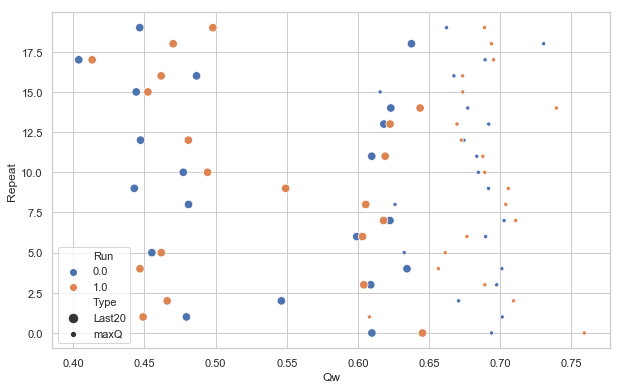

In [150]:
ax = sns.scatterplot(x="Qw", y="Repeat",
                     hue="Run", size="Type",
                     data=plot_data)

# Water energy is not correlated with the Qw

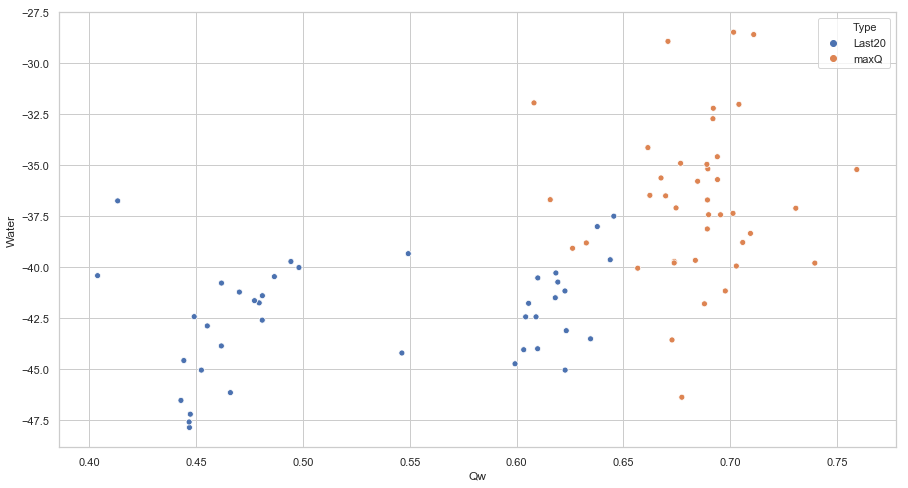

In [151]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="Qw", y="Water",
                     hue="Type",
                     data=plot_data)
# plt.savefig("/Users/weilu/Desktop/test.png", dpi=300)

In [100]:
data.agg(["max", "min", average_of_last_ten_percent])

,Steps,Qw,VTotal,Run,Repeat,Rg,Chain,Chi,Rama,P_AP,Water,Burial,Frag_Mem,Ebond,Epair
max,8000000.0,0.759261,-127.122231,1.0,19.0,26.537453,168.905642,43.591733,-44.768810,0.000000,0.704776,-49.582732,-203.340215,1573.083232,28.788246
min,4000.0,0.084460,-706.776193,0.0,0.0,9.856601,19.219310,3.371440,-289.201613,-16.657081,-55.790590,-58.264624,-341.427608,34.996280,0.882511
average_of_last_ten_percent,7962000.0,0.498119,-682.207254,1.0,19.0,10.409388,29.287886,7.808046,-280.148638,-9.445058,-40.005925,-56.361248,-333.342316,50.162303,4.629262


In [ ]:
np.mean()